In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

In [3]:
dataset = unpickle("record_n_data/wfm_n.pickle")

loading from record_n_data/wfm_n.pickle


In [4]:
def discriminate_n(time,y,thresh,**kwargs):
    
  # argument structure has changed! no more hysteresis definiton by default
  
  # pk2pk hysteresis, difference between upper and lower threshold
  hysteresis = kwargs.get("hysteresis",0)               
  # if offset==0 -> hysteresis is symmetrical around thresh
  hyst_offset = kwargs.get("hyst_offset",0)
    
  interpolate = kwargs.get("interpolate",True)
  
    
  out = np.zeros(len(y))
  
  rising_thresh  = thresh + hysteresis/2 + hyst_offset
  falling_thresh = thresh - hysteresis/2 + hyst_offset
    

  
  state = 1
  t1 = None
  tot = None

  t1_list = []
  tot_list = []
    
  for i in range(0,len(y)):
    v = y[i]
    
    if state == 1: 
      if v > rising_thresh:
        state = 0
        if t1 is None:
          if (interpolate and (i>0)):
            dt = time[i]-time[i-1]
            dy = y[i] - y[i-1]
            thresh_frac = (rising_thresh - y[i-1])/dy
            t1 = time[i-1] + dt*thresh_frac
          else:
            t1 = time[i]
    else: #state == 0
      if v < falling_thresh:
        state = 1
        if tot is None:
          if (interpolate and (i>0)):
            dt = time[i]-time[i-1]
            dy = y[i] - y[i-1] # negative
            thresh_frac = (falling_thresh - y[i-1])/dy
            tot = time[i-1] + dt*thresh_frac -t1
          else:
            tot = time[i] - t1
            
          if t1 is None:
            t1 = float('nan')
          if tot is None:
            tot = float('nan')
          t1_list += [t1]
          tot_list += [tot]
    
          t1  = None
          tot = None
    
    out[i] = state
    
  return (1-out, np.array(t1_list), np.array(tot_list))

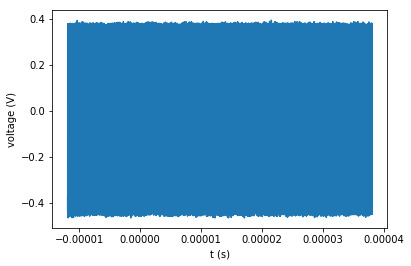

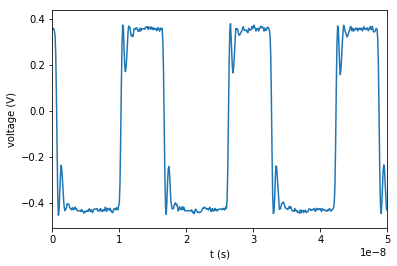

In [5]:
t = dataset[0]["t"]
wfm = dataset[0]["wfm"]

plt.plot(t,wfm)
plt.xlabel("t (s)")
plt.ylabel("voltage (V)")
plt.show()

plt.plot(t,wfm)
plt.xlabel("t (s)")
plt.ylabel("voltage (V)")
plt.xlim(0,50e-9)
plt.show()

In [6]:
threshold = 0.0

dummy, re_times,tot_times = discriminate_n(t,wfm,threshold)

periods = np.array(re_times)-np.array(shift_vector(re_times,1))


In [7]:
periods

array([ -1.18905816e-05,   1.60504509e-08,   1.60438487e-08, ...,
         1.60447080e-08,   1.60586359e-08,   1.60504747e-08])

In [8]:
len(periods)

3113

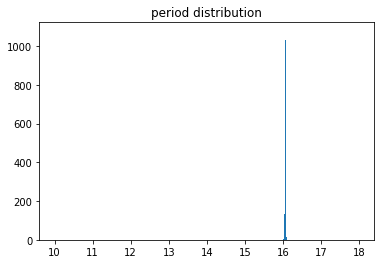

In [10]:
plt.hist(periods*1e9, bins = np.arange(10,18,0.01)) 
plt.title("period distribution") 
plt.show()

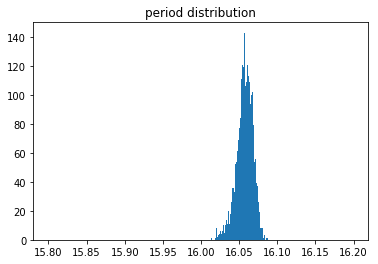

std_dev (ns)
0.0109142922039


In [11]:

plt.hist(periods*1e9, bins = np.arange(15.8,16.2,0.001)) 
plt.title("period distribution") 
plt.show()
print("std_dev (ns)")
print(np.std(1e9*periods[(periods>0)]))

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/000.png


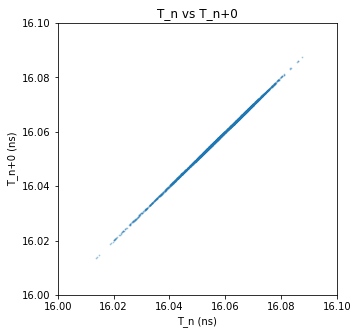

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/001.png


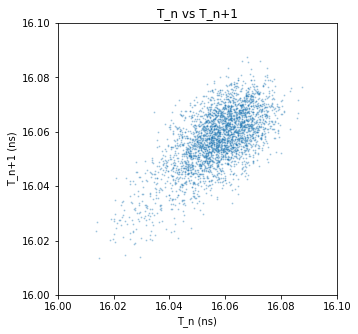

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/002.png


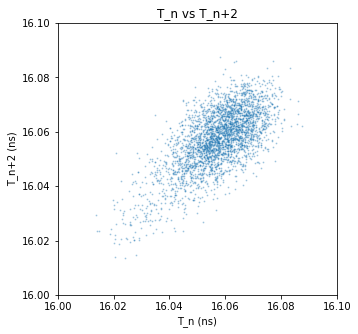

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/003.png


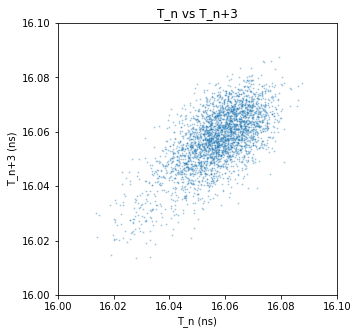

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/004.png


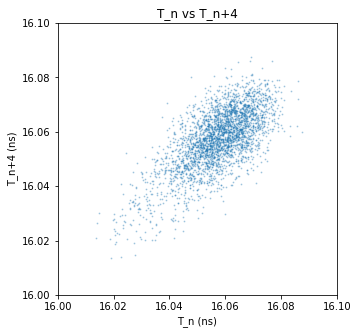

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/005.png


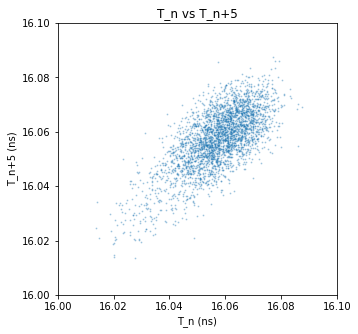

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/006.png


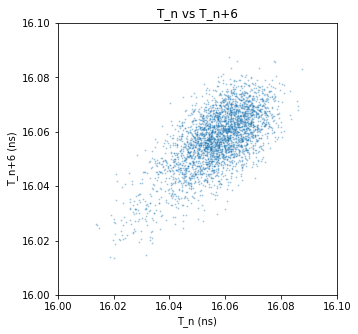

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/007.png


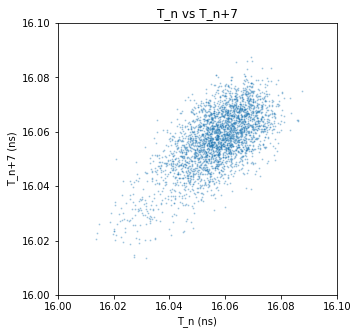

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/008.png


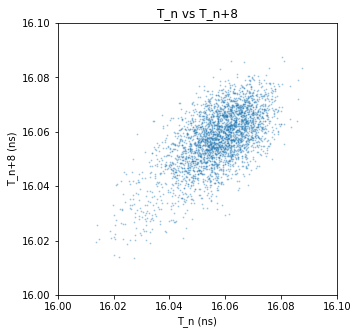

saving to /workdir/jupyter/lab_device_examples/lecroy_WR620ZI/jitter_correlation/correlation_n_anim/009.png


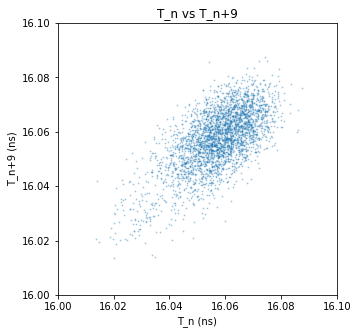

In [12]:

plt.rcParams["figure.figsize"] = (5,5)
    
for i in range(0,10,1):

  plt.scatter(periods*1e9,1e9*shift_vector(periods,-i),alpha=0.3,s=0.8)
  plt.xlim(16,16.1)
  plt.ylim(16,16.1)
  plt.title("T_n vs T_n+{:d}".format(i))
  plt.xlabel("T_n (ns)")
  plt.ylabel("T_n+{:d} (ns)".format(i))
  save_animation_frame(plt)
  plt.show()

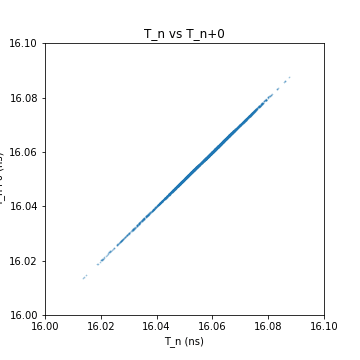

In [13]:
make_gif()

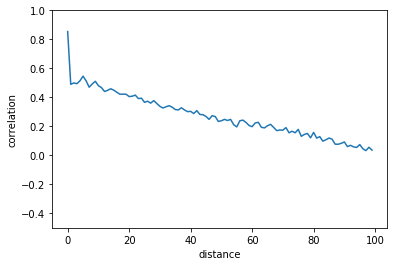

In [15]:
small_figure()

wfm = dataset[0]["wfm"]
t = dataset[0]["t"]

dummy, re_times,tot_times = discriminate_n(t,wfm,threshold)

periods = np.array(re_times)-np.array(shift_vector(re_times,1))

#P = 1e9*periods[(periods>0)*(periods<20e-9) ]
P = 1e9*periods[(periods>0) ]

cov_list = []

std  = np.std(P)
mean = np.mean(P)
for i in range(0,100):
  cov = np.sum((P-mean)[0:1000]*(shift_vector(P-mean,-i)[0:1000]))/1000/(std*std)
  cov_list += [cov]
pearson = np.array(cov_list)

plt.plot(pearson)
plt.xlabel("distance")
plt.ylabel("correlation")
plt.ylim(-0.5,1)

plt.show()

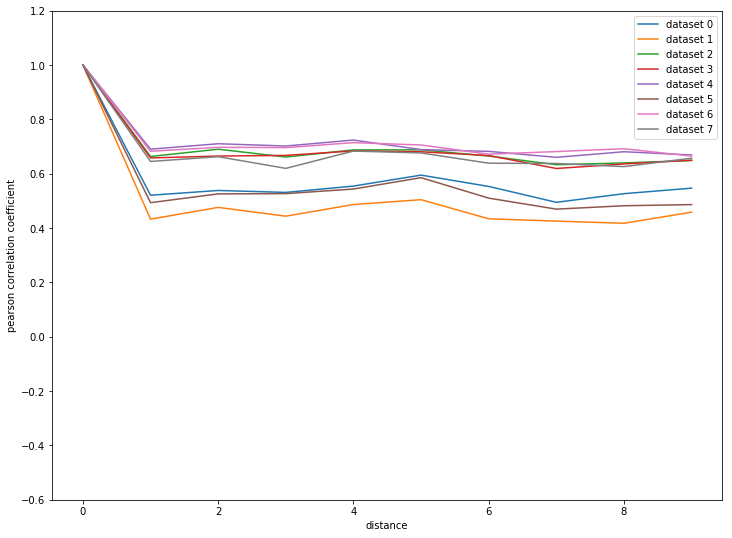

In [16]:
big_figure()

from statistics_kit import *

for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,threshold)
  
  periods = np.array(re_times)-np.array(shift_vector(re_times,1))
  
  P = 1e9*periods[(periods>0e-9) * (periods < 20e-9)]
  
  #ov_list = []
  #
  #std  = np.std(P)
  #mean = np.mean(P)
  #for i in range(0,10):
  #  cov = np.sum((P-mean)[0:1000]*(shift_vector(P-mean,-i)[0:1000]))/1000/(std*std)
  #  cov_list += [cov]
  #pearson = np.array(cov_list)
    
  pearson_list = []
  for i in range(0,10):
    X = P[10:1000]
    Y = shift_vector(P,-i)[10:1000]
    pearson_list += [pearson(X,Y)]
  
  plt.plot(pearson_list,label="dataset {:d}".format(j))
plt.xlabel("distance")
plt.ylabel("pearson correlation coefficient")
plt.legend()
plt.ylim(-0.6,1.2)

plt.show()

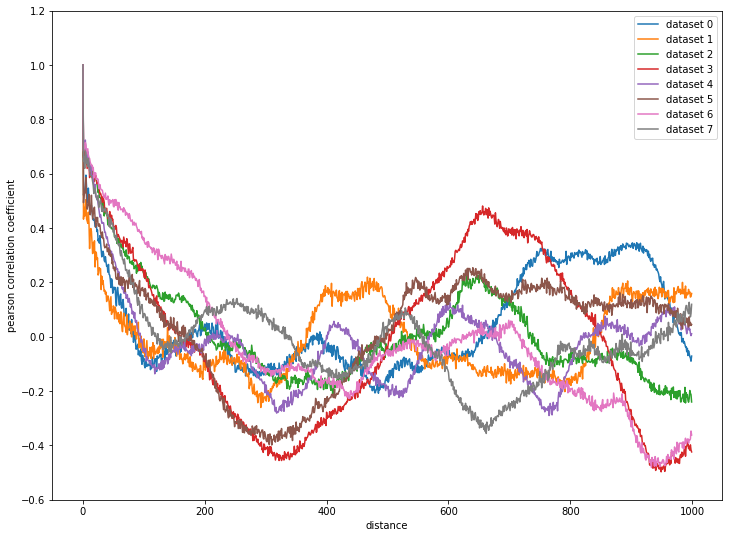

In [17]:
big_figure()

from statistics_kit import *

for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,threshold)
  
  periods = np.array(re_times)-np.array(shift_vector(re_times,1))
  
  P = 1e9*periods[(periods>0e-9) * (periods < 20e-9)]
  
  #ov_list = []
  #
  #std  = np.std(P)
  #mean = np.mean(P)
  #for i in range(0,10):
  #  cov = np.sum((P-mean)[0:1000]*(shift_vector(P-mean,-i)[0:1000]))/1000/(std*std)
  #  cov_list += [cov]
  #pearson = np.array(cov_list)
    
  pearson_list = []
  for i in range(0,1000):
    X = P[10:1000]
    Y = shift_vector(P,-i)[10:1000]
    pearson_list += [pearson(X,Y)]
  
  plt.plot(pearson_list,label="dataset {:d}".format(j))
plt.xlabel("distance")
plt.ylabel("pearson correlation coefficient")
plt.legend()
plt.ylim(-0.6,1.2)

plt.show()

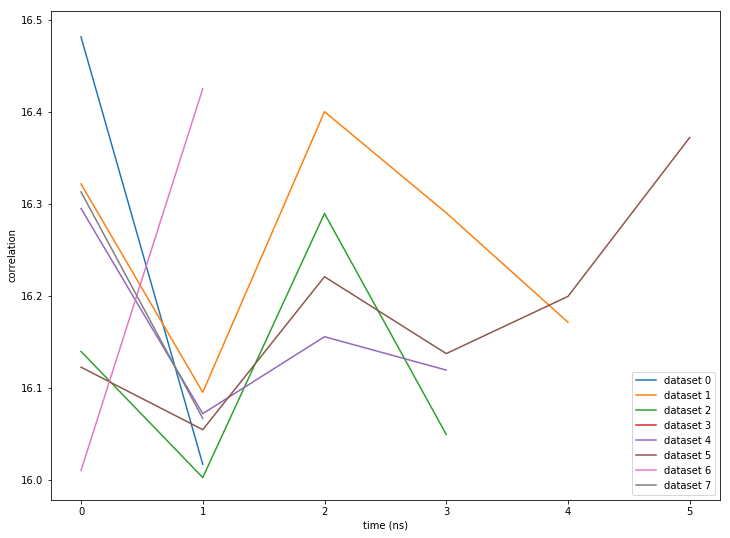

In [14]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,0.1e-3)
  
  periods = np.array(re_times)-np.array(shift_vector(re_times,1))
  
  P = 1e9*periods[(periods>16e-9) * (periods<16.5e-9)]
  
  
  plt.plot(P,label="dataset {:d}".format(j))
#plt.xlabel("distance")
plt.xlabel("time (ns)")
plt.ylabel("correlation")
plt.legend()
#plt.ylim(-0.5,1)

plt.show()

/usr/lib/python3/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


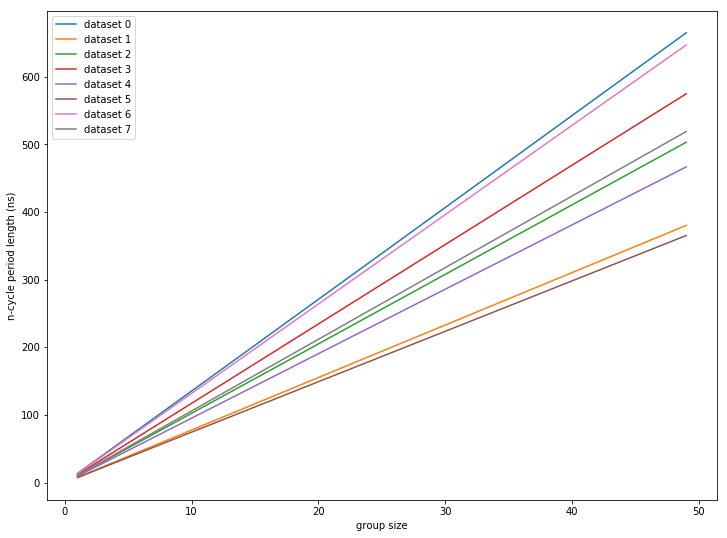

In [15]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,0.1e-3)
  
    
  mean_list = []
  std_list  = []
    
  for i in range(0,50):
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(means,label="dataset {:d}".format(j))
    
plt.xlabel("group size")
plt.ylabel("n-cycle period length (ns)")
plt.legend()

plt.show()

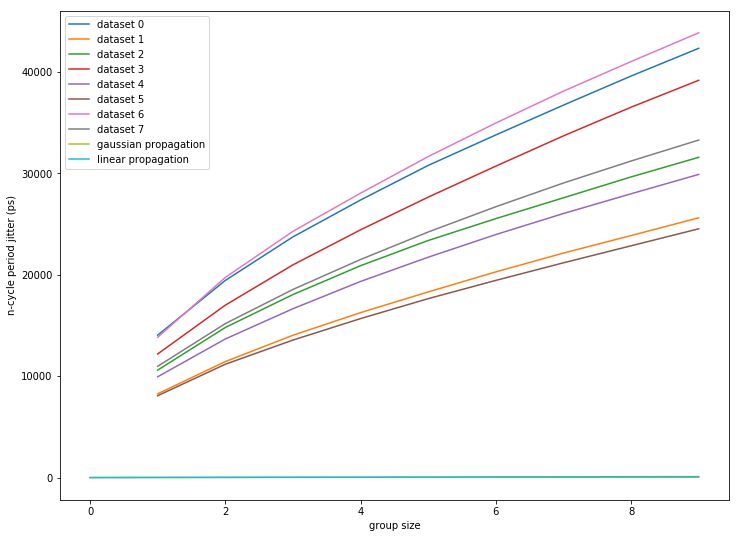

In [16]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,0.1e-3)
  
    
  mean_list = []
  std_list  = []
    
  myrange = np.array(range(0,10))
    
  for i in myrange:
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(stds*1e3,label="dataset {:d}".format(j))
    

plt.plot(myrange , 10.4*np.sqrt(myrange)  , label="gaussian propagation" )
plt.plot(myrange , 10.4*myrange  , label="linear propagation" )
plt.xlabel("group size")
plt.ylabel("n-cycle period jitter (ps)")
plt.legend()

plt.show()

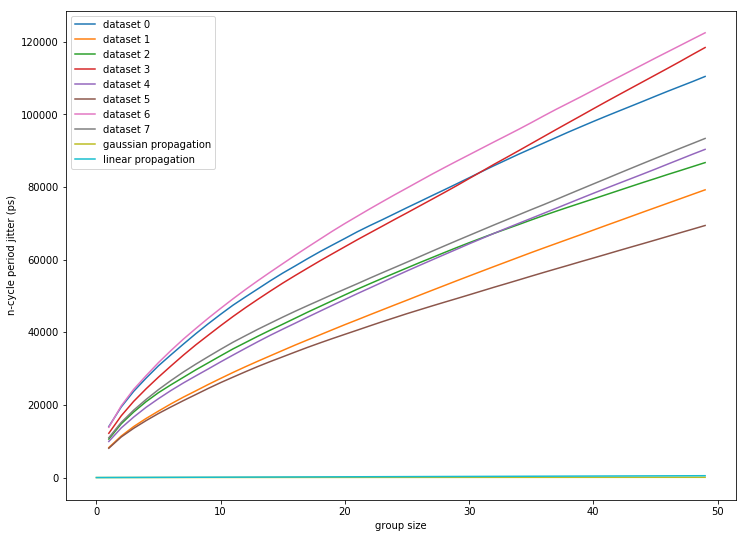

In [17]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,0.1e-3)
  
    
  mean_list = []
  std_list  = []
    
  myrange = np.array(range(0,50))
    
  for i in myrange:
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(stds*1e3,label="dataset {:d}".format(j))
    

plt.plot(myrange , 10.4*np.sqrt(myrange)  , label="gaussian propagation" )
plt.plot(myrange , 10.4*myrange  , label="linear propagation" )
plt.xlabel("group size")
plt.ylabel("n-cycle period jitter (ps)")
plt.legend()

plt.show()

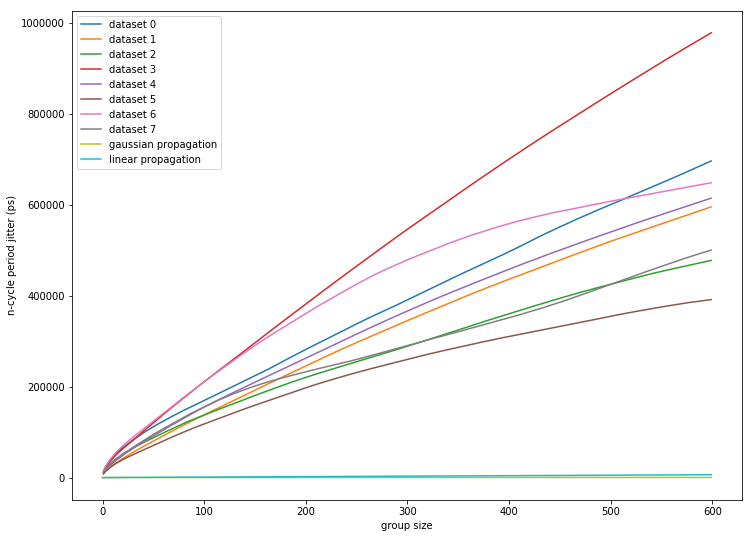

In [18]:
big_figure()



for j in range(0,len(dataset)):

  wfm = dataset[j]["wfm"]
  t = dataset[j]["t"]

  dummy, re_times,tot_times = discriminate_n(t,wfm,0.1e-3)
  
    
  mean_list = []
  std_list  = []
    
  myrange = np.array(range(0,600))
    
  for i in myrange:
    periods = np.array(re_times)-np.array(shift_vector(re_times,i))
    
    P = 1e9*periods[(periods>0)]
    
    
    std  = np.std(P)
    mean = np.mean(P)
    mean_list += [mean]
    std_list  += [std]
    
  means = np.array(mean_list)
  stds  = np.array(std_list)
  
  plt.plot(stds*1e3,label="dataset {:d}".format(j))
    

plt.plot(myrange , 10.4*np.sqrt(myrange)  , label="gaussian propagation" )
plt.plot(myrange , 10.4*myrange  , label="linear propagation" )
plt.xlabel("group size")
plt.ylabel("n-cycle period jitter (ps)")
plt.legend()

plt.show()